<a href="https://colab.research.google.com/github/Raj-Shriwastav/MachineLearning/blob/main/Amazon_Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon_electronics.csv")

In [4]:
df.head()


,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
df.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [7]:
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [8]:
df.shape

(1292954, 10)

In [9]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [10]:
df.dropna(subset=['user_attr'], inplace=True)


In [11]:
df.dropna(subset=['brand'], inplace=True)


In [41]:
df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

In [12]:
df.nunique()

item_id        1892
user_id       40401
rating            5
timestamp      4179
model_attr        3
category         10
brand            50
year             19
user_attr         2
split             3
dtype: int64

In [13]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['brand'] = df['brand'].astype(str)

In [14]:
# We can also see that the column Category is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['category'] = df['category'].astype(str)

In [15]:
# We can also see that the column Rating is of int64 data type, but it is actually a float.

# We can convert it to a float using the following code:

df['rating'] = df['rating'].astype(float)

In [16]:

# We can also see that the column User ID is of int64 data type, but it is actually a string.

# We can convert it to a string using the following code:

df['user_id'] = df['user_id'].astype(str)

In [17]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['item_id'] = df['item_id'].astype(str)

In [18]:
df.describe()

,rating,year,split
count,45166.000000,45166.000000,45166.000000
mean,4.218594,2012.079573,0.341075
std,1.221118,3.033574,0.721401
min,1.000000,2000.000000,0.000000
25%,4.000000,2011.000000,0.000000
50%,5.000000,2013.000000,0.000000
75%,5.000000,2014.000000,0.000000
max,5.000000,2018.000000,2.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45166 entries, 131 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     45166 non-null  object 
 1   user_id     45166 non-null  object 
 2   rating      45166 non-null  float64
 3   timestamp   45166 non-null  object 
 4   model_attr  45166 non-null  object 
 5   category    45166 non-null  object 
 6   brand       45166 non-null  object 
 7   year        45166 non-null  int64  
 8   user_attr   45166 non-null  object 
 9   split       45166 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.8+ MB


In [20]:
import datetime as datatime

In [21]:
df = df.dropna(subset=['timestamp'])

In [22]:
pd.to_datetime(df['timestamp'])

131       2000-06-15
233       2000-12-31
235       2001-01-02
259       2001-02-04
271       2001-03-02
             ...    
1292762   2018-08-29
1292812   2018-08-30
1292841   2018-09-01
1292874   2018-09-05
1292953   2018-10-01
Name: timestamp, Length: 45166, dtype: datetime64[ns]

In [23]:
df.describe()

,rating,year,split
count,45166.000000,45166.000000,45166.000000
mean,4.218594,2012.079573,0.341075
std,1.221118,3.033574,0.721401
min,1.000000,2000.000000,0.000000
25%,4.000000,2011.000000,0.000000
50%,5.000000,2013.000000,0.000000
75%,5.000000,2014.000000,0.000000
max,5.000000,2018.000000,2.000000


In [24]:
df.nunique()

item_id        1892
user_id       40401
rating            5
timestamp      4179
model_attr        3
category         10
brand            50
year             19
user_attr         2
split             3
dtype: int64

In [25]:
# check for duplicates

df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

In [26]:
# drop all duplicate values in rating category

df['rating'].dropna(inplace=True)

df['rating'].drop_duplicates(inplace=True)


<Axes: xlabel='rating', ylabel='count'>

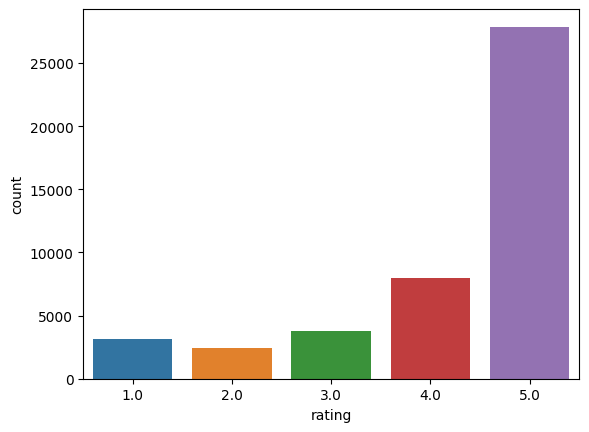

In [27]:
# the distribution of ratings

sns.countplot(x='rating', data=df)

<Axes: xlabel='year'>

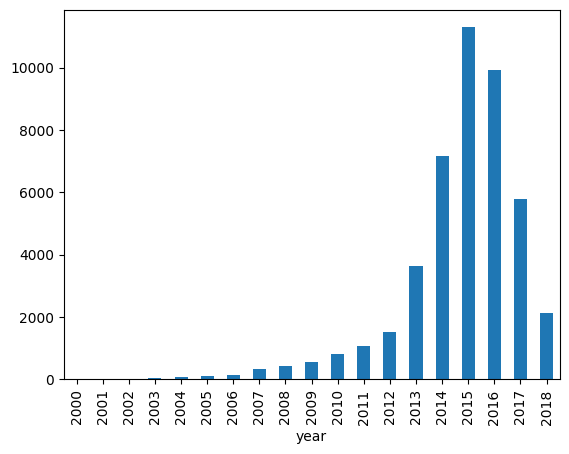

In [28]:
# what was the best year of sales

df['year'] = pd.DatetimeIndex(df['timestamp']).year

df.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

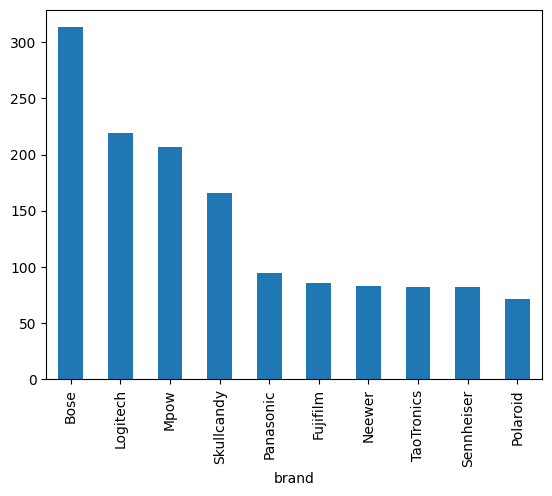

In [29]:
# what product sold the most in 2018

df[df['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).dropna().head(10).plot(kind='bar')


<Axes: xlabel='brand'>

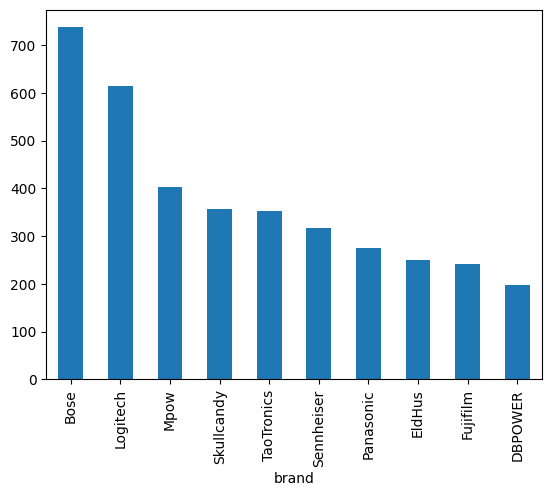

In [30]:
# 2017
df[df['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

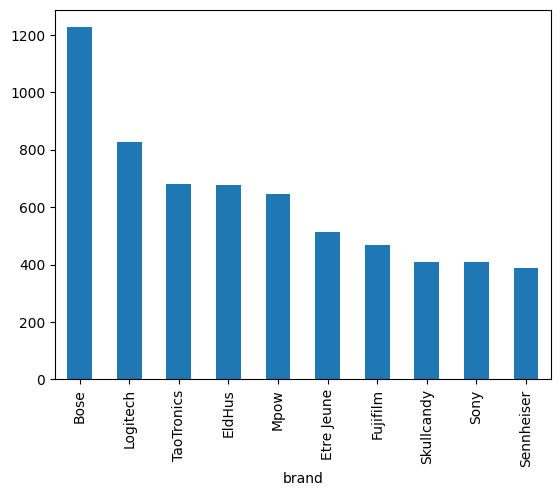

In [31]:
# 2016
df[df['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

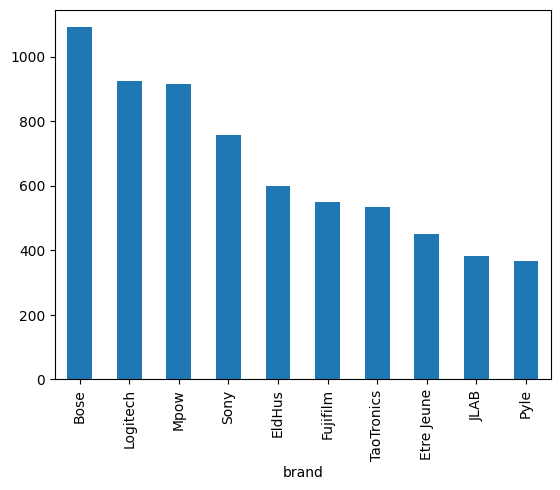

In [32]:
# 2015
df[df['year'] == 2015].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

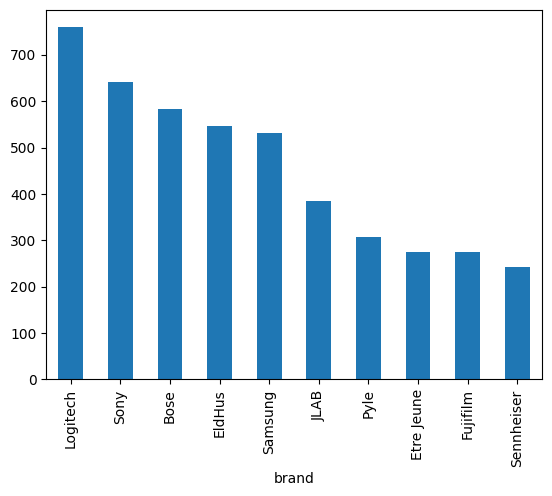

In [33]:
# 2014
df[df['year'] == 2014].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='year'>

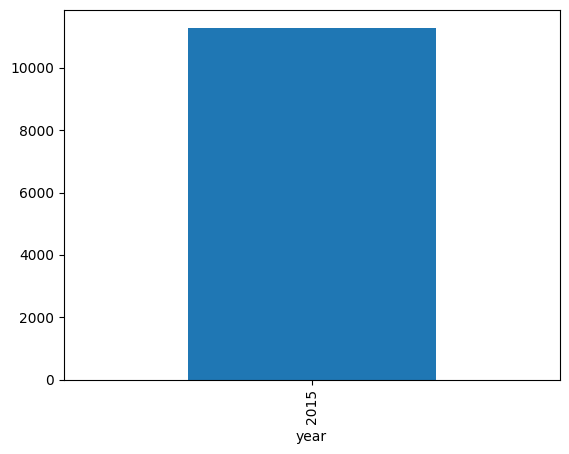

In [34]:
# How much was made in sales in the year 2015

df[df['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

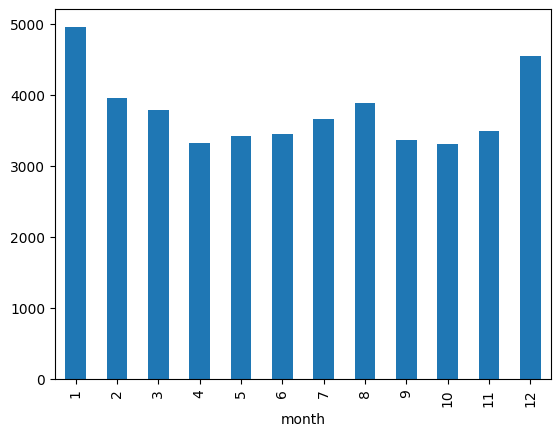

In [35]:
df['month'] = pd.DatetimeIndex(df['timestamp']).month

df.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

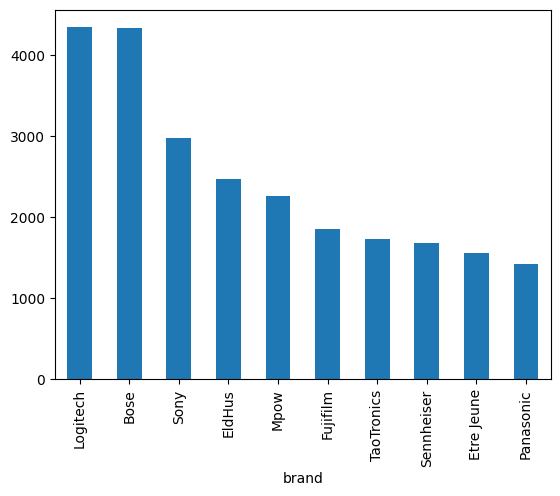

In [36]:
# What product by brand name sold the most?

df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

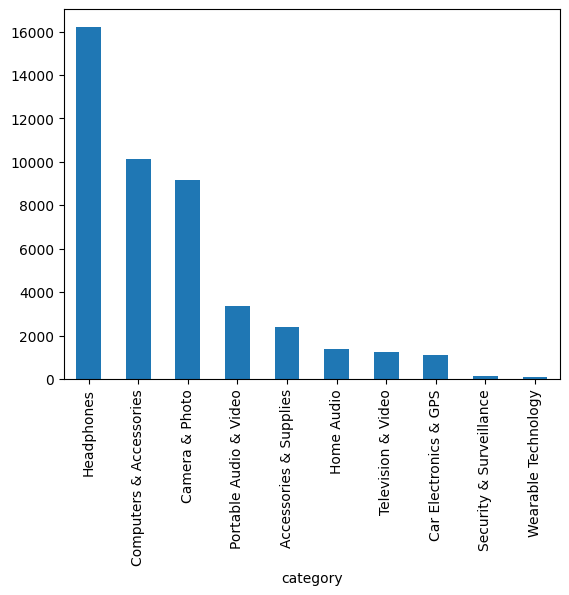

In [37]:
# What product by category sold the most?
df.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

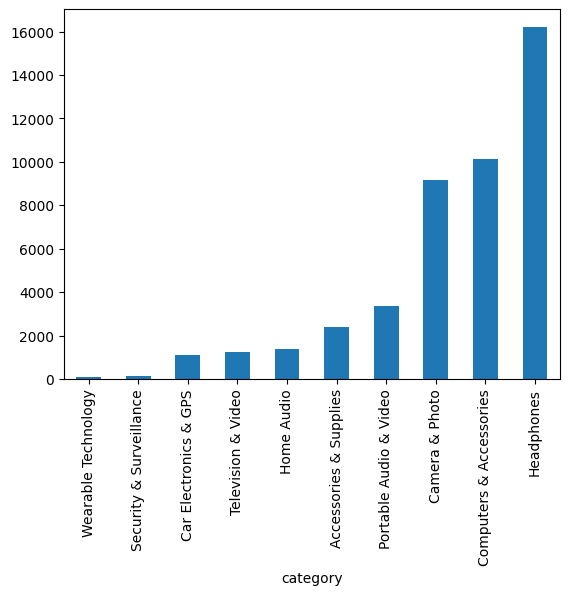

In [38]:
# What product by category sold the least?

df.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

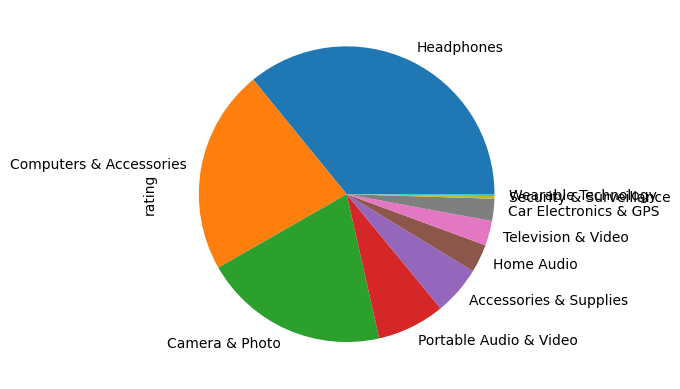

In [39]:
# category percentage sales

df.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

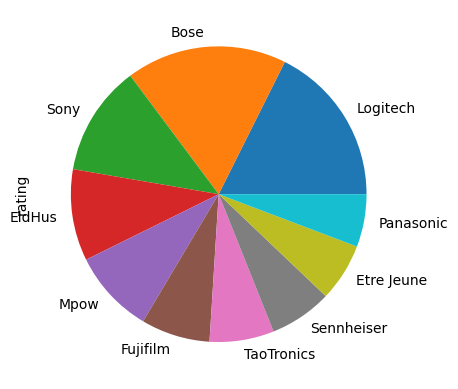

In [43]:
# brand percentage sales

df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

In [40]:
# We can see that the brand name of Bose and Logitech had the most sales

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.